In [1]:
pip install pandas numpy scikit-learn imbalanced-learn matplotlib xgboost shap


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 1.8 MB/s eta 0:00:32
   - -------------------------------------- 2.6/56.8 MB 4.6 MB/s eta 0:00:12
   --- ------------------------------------ 5.0/56.8 MB 6.4 MB/s eta 0:00:09
   ---- ----------------------------------- 7.1/56.8 MB 7.4 MB/s eta 0:00:07
   ------ --------------------------------- 9.2/56.8 MB 7.7 MB/s eta 0:00:07
   -------- ------------------------------- 11.5/56.8 MB 8.2 MB/s eta 0:00:06
   --------- ------------------------------ 13.6/56.8 MB 8.6 MB/s eta 0:00:06
   ---------- ----------------------------- 15.2/56.8 MB 8.5 MB/s eta 0:00:05
   ------------ --------------------------- 17.6/56.8 MB 8.7 MB/s eta 0:00:05
   ------------- -------------------------- 19.4/56.8 MB 8.7 MB/s eta 0:00:05
   --------------- ------------------------ 21.8/56.8 MB 8.9 MB/s eta 0:00:04
   ----

In [3]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, classification_report, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler
import joblib


In [13]:
import os
print(os.listdir())


['.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.python_history', '.streamlit', '.vscode', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'assignment.mlp.ipynb', 'car_and_bike.ipynb', 'Contacts', 'Cookies', 'countryproject.pbix', 'deeplearning.ipynb', 'Documents', 'Dog_&Cat_Task_.ipynb', 'Downloads', 'Favorites', 'Links', 'Local Settings', 'Microsoft', 'MLP_(Binary_class).ipynb', 'MM_Project.ipynb', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{d6f34cd7-3ba8-11f0-a9ae-954785230d33}.TM.blf', 'NTUSER.DAT{d6f34cd7-3ba8-11f0-a9ae-954785230d33}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{d6f34cd7-3ba8-11f0-a9ae-954785230d33}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Roaming', 'Saved Games', 'Searches', 'SendTo', 'Single_Prediction-20250521T102816Z-1-001.zip', 'Start Menu', "TASK'S.ipynb", 'Templates

In [15]:
df = pd.read_csv("creditcard.csv.zip")
print("Shape:", df.shape)
df.head()



Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
counts = df['Class'].value_counts().sort_index()
print(counts)
print("Fraud rate:", df['Class'].mean())


Class
0    284315
1       492
Name: count, dtype: int64
Fraud rate: 0.001727485630620034


In [19]:
print(df['Amount'].describe())
plt.figure(figsize=(6,3))
plt.hist(df['Amount'], bins=50, edgecolor='k');
plt.title("Transaction amount distribution (long tail)");
plt.xlabel("Amount")
plt.ylabel("Count")


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


Text(0, 0.5, 'Count')

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train fraud rate:", y_train.mean(), "Test fraud rate:", y_test.mean())


Train: (227845, 30) Test: (56962, 30)
Train fraud rate: 0.001729245759178389 Test fraud rate: 0.0017204452090867595


In [25]:
scaler = StandardScaler()
# Fit scaler on train Amount only
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test_scaled['Amount'] = scaler.transform(X_test[['Amount']])


In [33]:
lr = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)

y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]
y_pred_lr = lr.predict(X_test_scaled)

print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("PR-AUC:", average_precision_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr, digits=4))


ROC-AUC: 0.9721419993855731
PR-AUC: 0.7132448520859688
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



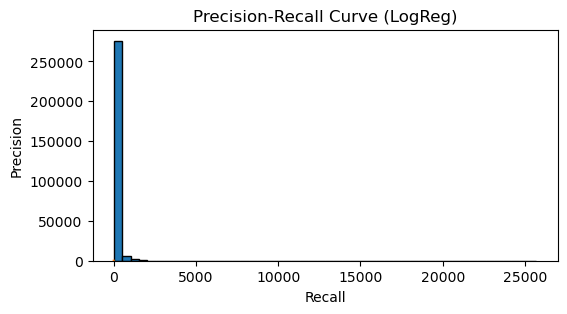

Best threshold by F1: 0.9999996269158535


In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (LogReg)")
plt.show()

# Compute F1 for thresholds
f1_scores = 2 * precision * recall / (precision + recall + 1e-12)
best_idx = np.nanargmax(f1_scores)
# thresholds array is shorter by 1 than precision/recall, handle carefully
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
print("Best threshold by F1:", best_threshold)


In [29]:
thr = best_threshold
y_pred_thr = (y_prob_lr >= thr).astype(int)
cm = confusion_matrix(y_test, y_pred_thr)
print("Confusion matrix (rows: true 0/1, cols: pred 0/1):\n", cm)
print(classification_report(y_test, y_pred_thr, digits=4))


Confusion matrix (rows: true 0/1, cols: pred 0/1):
 [[56850    14]
 [   19    79]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8495    0.8061    0.8272        98

    accuracy                         0.9994     56962
   macro avg     0.9246    0.9029    0.9135     56962
weighted avg     0.9994    0.9994    0.9994     56962



In [36]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]

print("RF ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("RF PR-AUC:", average_precision_score(y_test, y_prob_rf))


RF ROC-AUC: 0.9571890288895525
RF PR-AUC: 0.8589278575500874


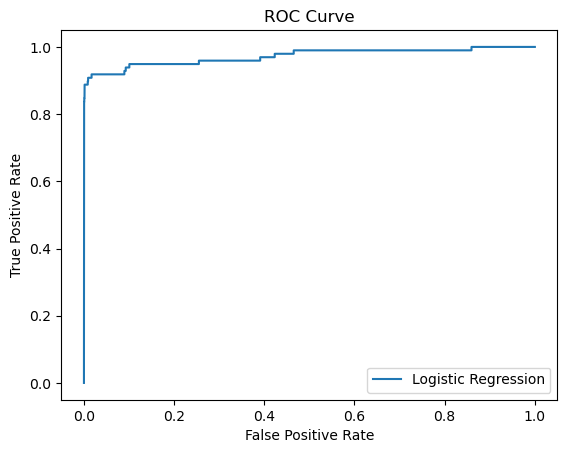

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


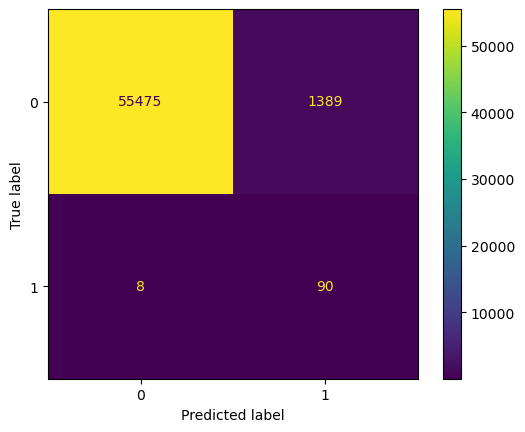

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.show()


In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)
print("Resampled fraud rate:", y_res.mean())

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_res, y_res)
print("PR-AUC:", average_precision_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))


Resampled fraud rate: 0.5
PR-AUC: 0.8738230141679699


In [38]:
# pick rf or rf_sm depending on best performance
best_model = rf  # or rf_sm / lr / xgb
joblib.dump(best_model, "best_model.joblib")
print("Saved model to best_model.joblib")


Saved model to best_model.joblib
